<a href="https://colab.research.google.com/github/sgparrot/sgparrot2021Lv1-1/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [84]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

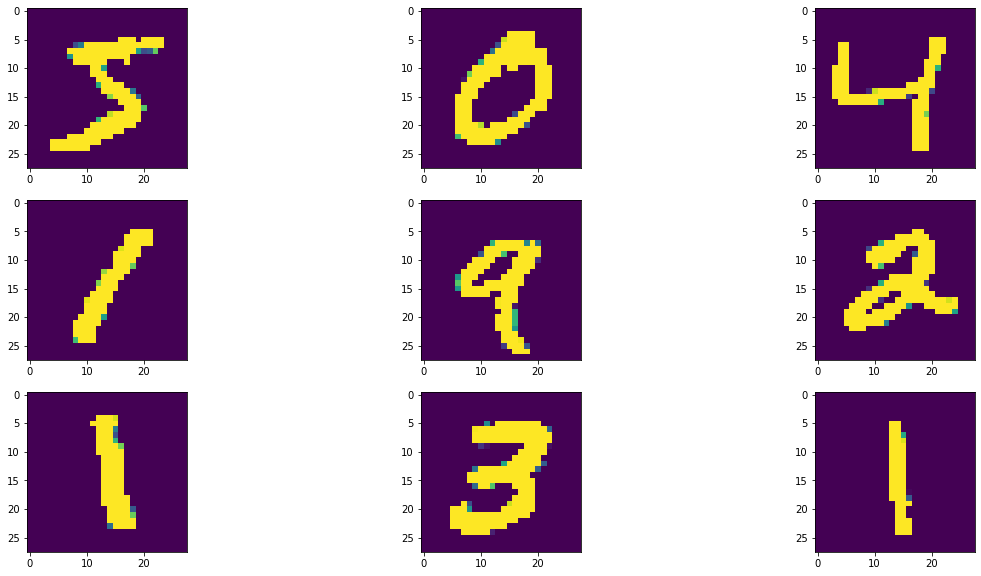

In [71]:
plt.figure(figsize=(20, 10))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train_cv[i])
plt.show()

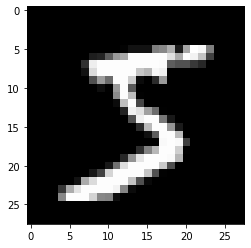

In [22]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [40]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [85]:
x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0], 28, 28, 1))

In [23]:
import cv2
cv2.__version__

'4.1.2'

In [34]:
kernel=np.ones((2, 2))/25.0
kernel

array([[0.04, 0.04],
       [0.04, 0.04]])

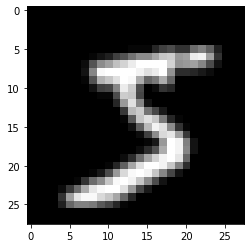

In [35]:
img_kernel=cv2.filter2D(x_train[0], -1, kernel)
plt.imshow(img_kernel, cmap='gray')
plt.show()

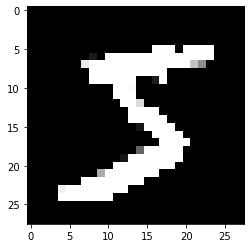

In [102]:
nkernel=np.array([[0, -1, 0],
                  [-1, 10, -1],
                  [0, -1, 0]])
img_sharp=cv2.filter2D(x_train[0], -1, nkernel)
plt.imshow(img_sharp, cmap='gray')
plt.show()

In [73]:
x_train=cv2.filter2D(x_train, -1, nkernel)
x_test=cv2.filter2D(x_test, -1, nkernel)

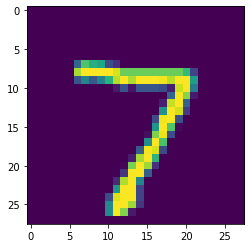

In [63]:
plt.imshow(x_test[0])

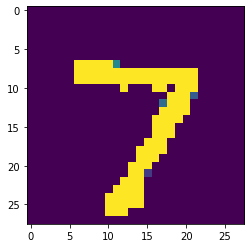

In [72]:
plt.imshow(x_test_cv[0])

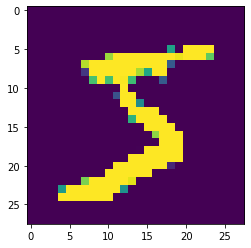

In [38]:
plt.imshow(x_train[0])

In [6]:
num_classes=10

In [86]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [87]:
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [77]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [78]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [79]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
375/375 [==============================] - 34s 92ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0415 - val_accuracy: 0.9895
Epoch 2/5
375/375 [==============================] - 34s 92ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0427 - val_accuracy: 0.9898
Epoch 3/5
375/375 [==============================] - 34s 92ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0411 - val_accuracy: 0.9898
Epoch 4/5
375/375 [==============================] - 35s 92ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0477 - val_accuracy: 0.9901
Epoch 5/5
375/375 [==============================] - 35s 92ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0528 - val_accuracy: 0.9894


In [81]:
def acc_loss_plot(hist):
  fig, loss_ax=plt.subplots()
  acc_ax=loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='upper left')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper right')

  plt.show()

baseline accuracy


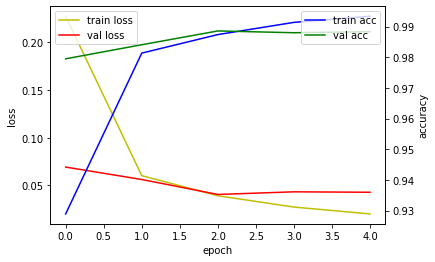

None


In [82]:
print("baseline accuracy")
print(acc_loss_plot(hist))

In [89]:
score=model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.045272987335920334
Test accuracy:  0.989799976348877


In [90]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

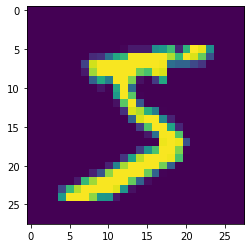

In [93]:
plt.imshow(x_train[0])

In [105]:
x_train_gray=cv2.cvtColor(x_train[0], cv2.COLOR_BGR2GRAY)               

error: ignored

In [104]:
x_train_cv=cv2.adaptiveThreshold(x_train, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 99, 10)
plt.imshow(x_train_cv[0])

error: ignored